In [1]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
sns.set()

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os.path
import scipy 
import scipy.stats as stats
import statsmodels as smr
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf
scipy.stats.chisqprob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)

/Users/marika/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
class Project:   
    def __init__(self):
        self.data = None
        self.train_data = None
        self.test_data = None
            
    def _load_data_(self,filepath):
      
        #if (~os.path.isfile('train.csv')) | (~os.path.isfile('test.csv')):
           # self.data = pd.read_csv(filepath,encoding='ISO-8859-1')
           # self.train_test_split()
           # self._write_data_()
            
        self.train_data = pd.read_csv('train.csv')
                                #,encoding='ISO-8859-1')
        self.test_data = pd.read_csv('test.csv',encoding='ISO-8859-1')
        return self.train_data
        
    def _write_data_(self):
        self.train_data.to_csv('train.csv')
        self.test_data.to_csv('test.csv')
    
    def train_test_split(self):
        self.train_data, self.test_data = train_test_split(self.data, test_size=0.2, random_state=42)   
        
    def null_summary(self,df):
        print(df.isnull().sum())
        all_data_na = (df.isnull().sum() / len(df)) * 100
        all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
        missing_data.head()
        if missing_data.size> 0:
            f, ax = plt.subplots(figsize=(15, 12))
            plt.xticks(rotation='90')
            sns.barplot(x=all_data_na.index, y=all_data_na)
            plt.xlabel('Features', fontsize=15)
            plt.ylabel('Percent of missing values', fontsize=15)
            plt.title('Percent missing data by feature', fontsize=15)
            plt.show()
            
    def get_stats(self,df,variable):
        print("Skewness: %f" % df[variable].skew())
        print("Kurtosis: %f" % df[variable].kurt())
        print("Mean: %f" % df[variable].mean())
        print("Variance: %f" % (df[variable].var()))

            
    def correlation_map(self,df,outcome,k):
        corrmat = df.corr()
        col_large = corrmat.nlargest(k+1,outcome)[outcome].index
        col_small = corrmat.nsmallest(k,outcome)[outcome].index
        cols = col_large.union(col_small)
        cm = np.corrcoef(corrmat[cols].loc[cols].values.T)
        print(corrmat[cols].loc[outcome])
        #sns.set(font_scale=1.25)
        hm = sns.heatmap(cm, cbar=True, vmax=1,annot=True, fmt='.1f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
        return cols
    
    def encode_organization(self,x):
            if 'Academy' in x:
                return 1
            elif 'Instituion' in x:
                return 2
            elif 'College' in x:
                return 3
            elif 'University' in x:
                return 4
            else:
                return 0
    
    def encode_cost(self,df):
        prices = []
        for i in range(len(df)):
            if pd.notnull(df['NPT4_PUB'][i]):
                prices.append(df['NPT4_PUB'][i])
            elif pd.notnull(df['NPT4_PRIV'][i]):
                prices.append(df['NPT4_PRIV'][i])
            else:
                prices.append(np.NaN) 
        
        df.loc[:,'NET_COST'] = pd.Series(prices, index=df.index)
        
        return df
    
    def encode_25KBinary(self, df):
        vals = []
        for i in range(len(df)):
            if float(df['gt_25k_p6'][i]) >= 0.6:
                vals.append(1)
            elif float(df['gt_25k_p6'][i]) < 0.6:
                vals.append(0)
            else:
                vals.append(np.NaN)
        
        df.loc[:,'Binary_25k'] = pd.Series(vals, index=df.index)
        
        return df
    
    def encode_state(self,x):
        west = ['WA','MT','OR','ID','WT','CA','NV','UT','CO','AZ','NM']
        midwest = ['ND','MN','SD','NE','KS','IA','MO','WI','IL','MI','IN','OH','WY']
        northeast = ['NY','PA','NJ','RI','CT','MA','VT','NH','ME']
        south = ['TX','OK','AR','LA','MS','AL','GA','TN','KY','WV','DC','MD','VA','DE','NC','SC','FL']
        others =['AK','HI','PR','PW','AS','GU','FM','VI']
        
        if x in others:
            return 0
        elif x in midwest:
            return 1
        elif x in south:
            return 2
        elif x in west:
            return 3
        elif x in northeast:
            return 4
        else: return x
        
    def compute_ci(self,x):
        print('tn,p,dof =',sms.DescrStatsW(x).ttest_mean(x.mean()))
        print('CI =',sms.DescrStatsW(x).tconfint_mean())

In [4]:
project = Project()
project._load_data_('train.csv')

,Unnamed: 0,INSTNM,CITY,STABBR,PREDDEG,CONTROL,LOCALE,SATVRMID,SATMTMID,SATWRMID,...,RET_PTL4,PCTFLOAN,UG25abv,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,md_earn_wne_p10,gt_25k_p6
0,7440,Marian Health Careers Center-Van Nuys Campus,Van Nuys,CA,1,3,11.0,NaN,NaN,NaN,...,NaN,0.6786,0.5745,15680,174.080144,0.847161572,NaN,0.27471978,47500,0.767567575
1,5144,Emma's Beauty Academy-Juana Diaz,Juana Diaz,PR,1,3,23.0,NaN,NaN,NaN,...,NaN,0.0000,0.1733,NaN,NaN,PrivacySuppressed,NaN,0.703098375,13400,0.181818187
2,7169,Milan Institute-Nampa,Nampa,ID,1,3,22.0,NaN,NaN,NaN,...,NaN,0.4332,0.4314,9500,105.469475,0.351691581,NaN,NaN,16100,0.249343827
3,5160,University of Phoenix-Bay Area Campus,San Jose,CA,3,3,11.0,NaN,NaN,NaN,...,NaN,0.6299,0.8464,35500,394.122775,0.406534043,0.135344954,NaN,53400,0.705231071
4,4987,Sanford-Brown Institute-Tampa,Tampa,FL,1,3,21.0,NaN,NaN,NaN,...,NaN,0.6094,0.4858,9500,105.469475,0.409117821,NaN,0.596397059,28300,0.524061024
5,2415,Truckee Meadows Community College,Reno,NV,2,1,12.0,NaN,NaN,NaN,...,0.4680,0.1438,0.3980,10000,111.0205,0.551597052,NaN,0.203587983,32500,0.543252587
6,6076,Healing Arts Institute,Perrysburg,OH,1,3,21.0,NaN,NaN,NaN,...,NaN,0.6197,0.6250,7917,87.89492985,0.755102041,NaN,NaN,NaN,PrivacySuppressed
7,1790,Maryland University of Integrative Health,Laurel,MD,4,2,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN
8,7170,Milan Institute of Cosmetology-El Paso,El Paso,TX,1,3,11.0,NaN,NaN,NaN,...,NaN,0.4466,0.4847,14252,158.2264166,0.291276491,NaN,NaN,18900,0.228511527
9,3857,Middle Tennessee State University,Murfreesboro,TN,3,1,12.0,515.0,510.0,NaN,...,NaN,0.5732,0.2315,22170.5,246.1379995,0.739414441,0.453413673,NaN,36100,0.592180908


In [5]:
df = project.train_data
df = df.drop(df.columns[0],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6243 entries, 0 to 6242
Data columns (total 42 columns):
INSTNM                    6243 non-null object
CITY                      6243 non-null object
STABBR                    6243 non-null object
PREDDEG                   6243 non-null int64
CONTROL                   6243 non-null int64
LOCALE                    5911 non-null float64
SATVRMID                  1036 non-null float64
SATMTMID                  1048 non-null float64
SATWRMID                  631 non-null float64
ACTCMMID                  1076 non-null float64
ACTENMID                  939 non-null float64
ACTMTMID                  940 non-null float64
ACTWRMID                  247 non-null float64
SAT_AVG                   1136 non-null float64
DISTANCEONLY              5913 non-null float64
UGDS                      5680 non-null float64
UGDS_WHITE                5680 non-null float64
UGDS_BLACK                5680 non-null float64
UGDS_HISP                 5680 non-null 

In [6]:
df = df.apply(lambda x: x.replace('PrivacySuppressed',np.NAN))
df = project.encode_cost(df)
df = project.encode_25KBinary(df)

In [7]:
df['RPY_3YR_RT_SUPP'] = pd.to_numeric(df['RPY_3YR_RT_SUPP'])
df['md_earn_wne_p10'] = pd.to_numeric(df['md_earn_wne_p10'])
df['GRAD_DEBT_MDN_SUPP'] = pd.to_numeric(df['GRAD_DEBT_MDN_SUPP'])
df['GRAD_DEBT_MDN10YR_SUPP'] = pd.to_numeric(df['GRAD_DEBT_MDN10YR_SUPP'])
df['C150_4_POOLED_SUPP'] = pd.to_numeric(df['C150_4_POOLED_SUPP'])
df['C200_L4_POOLED_SUPP'] = pd.to_numeric(df['C200_L4_POOLED_SUPP'])

In [8]:
columns = df.columns
#drop outcomes variables and "name" variables 
treatment_variables = columns.drop(['INSTNM','CITY','STABBR','RPY_3YR_RT_SUPP', 'md_earn_wne_p10', 'gt_25k_p6', 'Binary_25k'])

In [9]:
#only keep the variables if less than 20% of the values are missing ( SHOULD I KEEP IT at 20%?)
keep_variables = []
for i in range(len(treatment_variables)):
    x = df[str(treatment_variables[i])].isnull().sum()/float((len(df)))
    if x <= 0.2:
        keep_variables.append(treatment_variables[i]) 

In [10]:
np.mean(df['RPY_3YR_RT_SUPP'])

0.5985876295933767

In [11]:
np.mean(df['Binary_25k'])

0.30540938749736896

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
folds = 100
shuffled = df.sample(frac=1)
print (len(shuffled))
idxs = np.arange(len(shuffled),dtype='i')/int(np.ceil(len(shuffled)/float(folds)))
#ind_folds = np.array([i%folds for i in range(len(shuffled))])
#ind_foldsp
print idxs

6243
[ 0  0  0 ... 99 99 99]


In [46]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
    predictions = [np.mean(df['RPY_3YR_RT_SUPP']) for i in range(63)]
        
    #lm = smf.ols('quality~ ' + '+'.join(list(set(df.columns)-{'quality'})), data=train).fit()
    #predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.039234018427516296
3.493476551474056e-05


In [132]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
    predictions = [np.mean(df['RPY_3YR_RT_SUPP']) for i in range(63)]
        
    #lm = smf.ols('quality~ ' + '+'.join(list(set(df.columns)-{'quality'})), data=train).fit()
    #predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.037057821048808795
7.241025764649602e-05


In [133]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
    predictions = [np.mean(df['RPY_3YR_RT_SUPP']) for i in range(63)]
        
    #lm = smf.ols('quality~ ' + '+'.join(list(set(df.columns)-{'quality'})), data=train).fit()
    #predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.03731969540760748
1.3947701538996772e-18


In [17]:
fs = max(idxs)+1
accur = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
    predictions = [0.0 for i in range(63)]
        
    #lm = smf.ols('quality~ ' + '+'.join(list(set(df.columns)-{'quality'})), data=train).fit()
    #predictions = lm.predict(test)
    for x in range(len(test)):
        if test.iloc[x]['Binary_25'] == predictions[x]:
            correct =correct +1
        elif 
    accur[f] = accuracy_score(predictions,test['Binary_25k'])

print (accur.mean())
print (accur.std(ddof=1)/np.sqrt(fs))

ValueError: Can't handle mix of binary and continuous

In [134]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
    predictions = [0 for i in range(63)]
        
    #lm = smf.ols('quality~ ' + '+'.join(list(set(df.columns)-{'quality'})), data=train).fit()
    #predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.20408163265306123
0.0


In [135]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
    predictions = [0 for i in range(63)]
        
    #lm = smf.ols('quality~ ' + '+'.join(list(set(df.columns)-{'quality'})), data=train).fit()
    #predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.36734693877551033
1.1158161231197418e-17


In [48]:
drop_cols = []
for i in df.columns:
    if i =='RPY_3YR_RT_SUPP':
        next
    elif i == 'Binary_25k':
        next
    elif i not in keep_variables:
        drop_cols.append(i)
    elif i == 'GRAD_DEBT_MDN10YR_SUPP':
        drop_cols.append(i)
    elif i == 'UGDS_UNKN':
        drop_cols.append(i)

In [49]:
drop_cols

['INSTNM',
 'CITY',
 'STABBR',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'UGDS_UNKN',
 'NPT4_PUB',
 'NPT4_PRIV',
 'RET_FT4',
 'RET_FTL4',
 'RET_PT4',
 'RET_PTL4',
 'GRAD_DEBT_MDN10YR_SUPP',
 'C150_4_POOLED_SUPP',
 'C200_L4_POOLED_SUPP',
 'md_earn_wne_p10',
 'gt_25k_p6']

In [ ]:
#df2 has transformed the undergraduate racial percentages (except white) + UGDS

In [50]:
df2 = df.drop(drop_cols, axis = 1)

In [52]:
#df2.loc[:,'RPY_3YR_RT_SUPP'] = pd.Series(df.RPY_3YR_RT_SUPP, index=df2.index)
#df2.loc[:,'Binary_25k'] = pd.Series(df.Binary_25k,index=df2.index)

In [51]:
import scipy.special as sc

In [52]:
for i in range(len(df2.columns)):
    if 'UGDS' in df2.columns[i]:
        if 'UGDS_WHITE' == df2.columns[i]:
            next
        else:
            x = sc.boxcox(np.array(df2[df2.columns[i]]),0.5)
            df2.loc[:,df2.columns[i]] = pd.Series(x, index=df2.index)
    #if 'GRAD_DEBT' in df2.columns[i]:
        #x = sc.boxcox(np.array(df2[df2.columns[i]]),0.5)
        #df2.loc[:,df2.columns[i]] = pd.Series(x, index=df2.index)

In [53]:
df2.to_csv('./trans1.csv')

In [ ]:
#df3 has transformed the racial percentages (except white),
# the number of undergrads, and the PCTFLOAN (federal loan), and PPTUG_EF (part-time)

In [54]:
df3 = df.drop(drop_cols, axis = 1)

In [57]:
#df3.loc[:,'RPY_3YR_RT_SUPP'] = pd.Series(df.RPY_3YR_RT_SUPP, index=df3.index)
#df3.loc[:,'Binary_25k'] = pd.Series(df.Binary_25k,index=df3.index)

In [55]:
for i in range(len(df3.columns)):
    if 'UGDS' in df3.columns[i]:
        if 'UGDS_WHITE' == df3.columns[i]:
            next
        else:
            x = sc.boxcox(np.array(df3[df3.columns[i]]),0.5)
            df3.loc[:,df3.columns[i]] = pd.Series(x, index=df3.index)
    if 'PCTFLOAN' in df3.columns[i]:
        x = sc.boxcox(np.array(df3[df3.columns[i]]),2)
        df3.loc[:,df3.columns[i]] = pd.Series(x, index=df3.index)
    if 'PPTUG_EF' in df3.columns[i]:
        x = sc.boxcox(np.array(df3[df3.columns[i]]),2)
        df3.loc[:,df3.columns[i]] = pd.Series(x, index=df3.index)

In [56]:
df3.to_csv('./trans2.csv')

In [57]:
df = df.drop(drop_cols, axis = 1)

In [ ]:
#plot the original variables on a qqplot

In [61]:
random_subset = df[:600]

In [62]:
import scipy as sp

PREDDEG


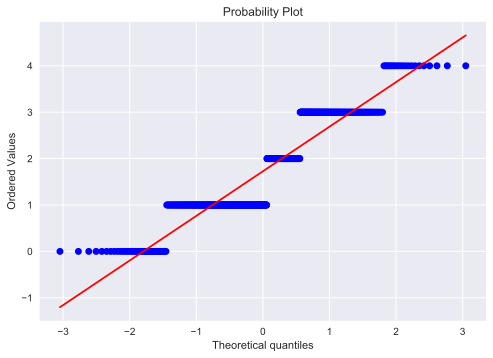

CONTROL


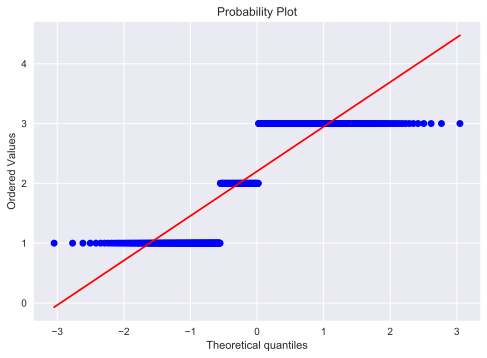

LOCALE


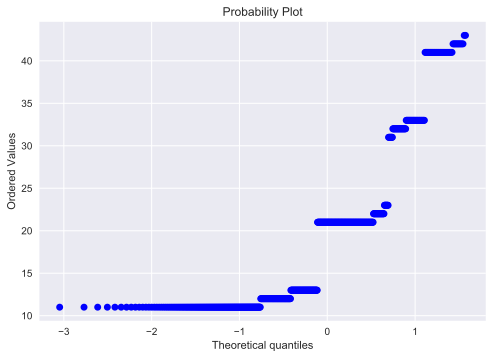

DISTANCEONLY


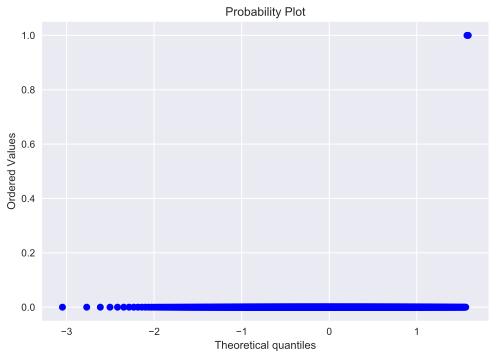

UGDS


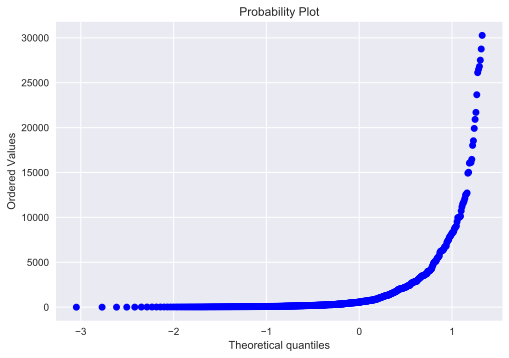

UGDS_WHITE


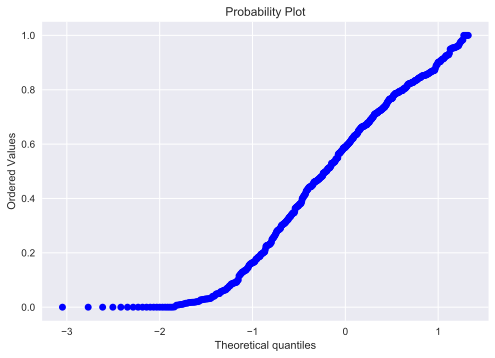

UGDS_BLACK


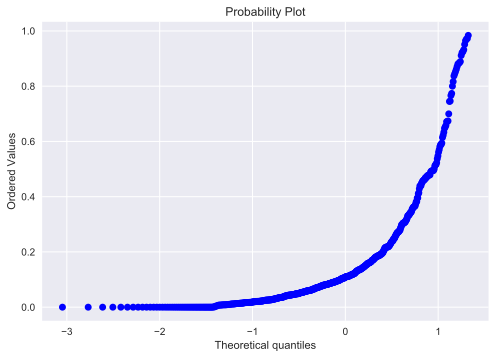

UGDS_HISP


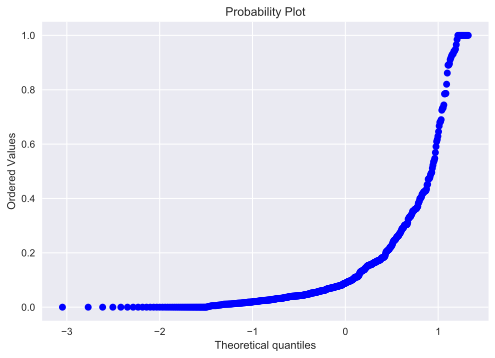

UGDS_ASIAN


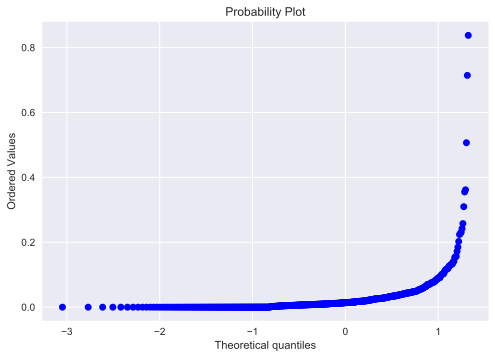

UGDS_AIAN


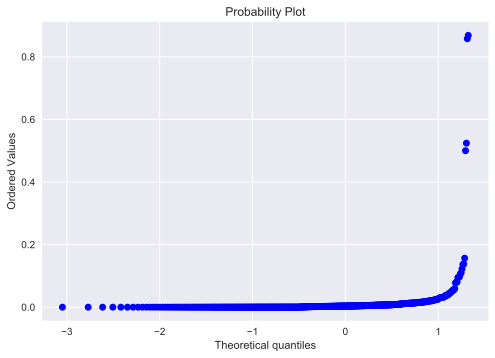

UGDS_NHPI


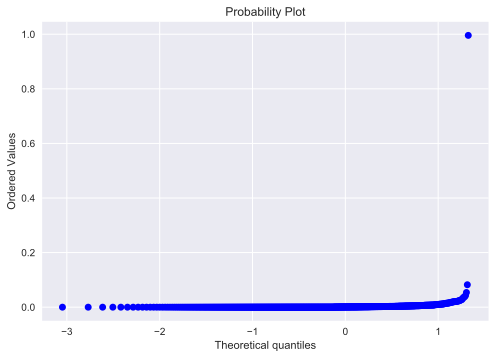

UGDS_2MOR


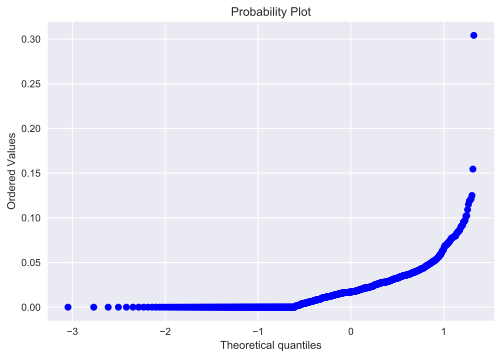

UGDS_NRA


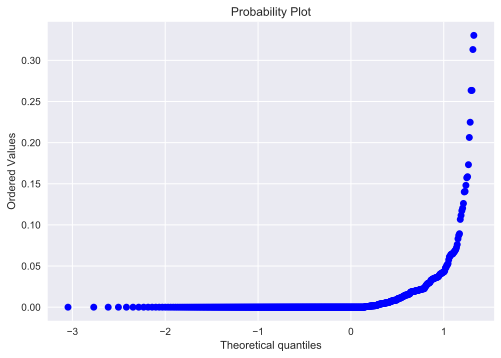

PPTUG_EF


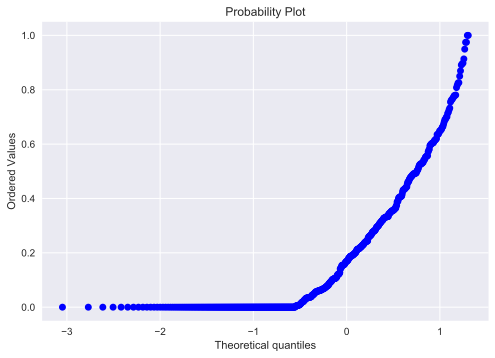

PCTPELL


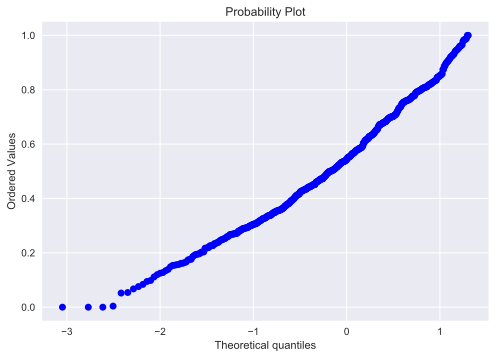

PCTFLOAN


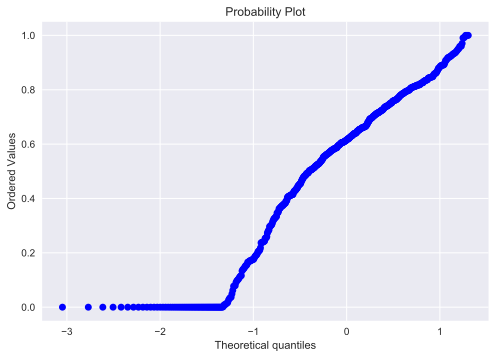

UG25abv


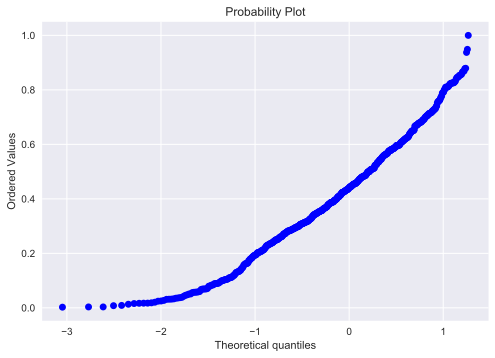

GRAD_DEBT_MDN_SUPP


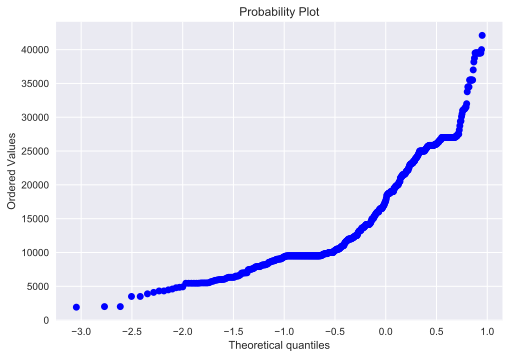

NET_COST


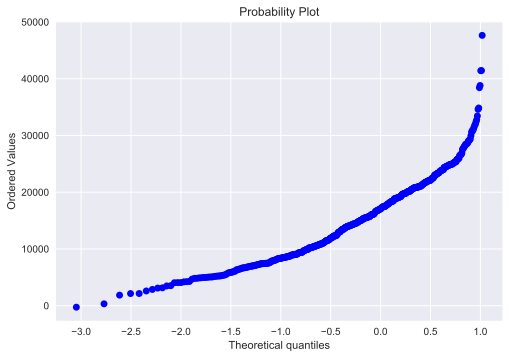

In [39]:
for i in range(len(random_subset.columns)):
    print (random_subset.columns[i])
    #sm.qqplot(random_subset[random_subset.columns[i]], line='s')
    stats.probplot(random_subset[random_subset.columns[i]], dist="norm", plot=pylab)
    plt.show()

In [ ]:
#Guess Baseline - Linear Regression

In [58]:
total = 'CONTROL + PREDDEG + UGDS_WHITE + UGDS_BLACK + UG25abv'

In [59]:
smf.ols('RPY_3YR_RT_SUPP ~ ' + total, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     992.6
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        22:40:09   Log-Likelihood:                 2461.5
No. Observations:                4710   AIC:                            -4911.
Df Residuals:                    4704   BIC:                            -4872.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5923      0.013     46.133      0.000       0.567       0.617
CONTROL       -0.0235      0.003     -8.022      0.000      -0.029      -0.018
PREDDEG        0.0666      0.003     24.624      0.000       0.061       0.072
UGDS_WHITE     0.1416      0.009     15.032      0.000       0.123       0.160
UGDS_BLACK    -0.2324      0.012    -19.477      0.000      -0.256      -0.209
UG25abv       -0.2243      0.011    -21.196      0.000      -0.245      -0.204
==============================================================================
Omnibus:                       25.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.172
Skew:                           0.146   Prob(JB):                     1.26e-06
Kurtosis:                       3.231   Cond. No.                         24.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + total, data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.021304069738988553
3.486925384749193e-19


In [61]:
shuffled2 = df2.sample(frac = 1)
shuffled3 = df3.sample(frac = 1)

In [62]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + total, data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.02273110481297904
0.0


In [63]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + total, data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.01681915673004864
3.486925384749193e-19


In [ ]:
#Guess Baseline - Logistic Regression

In [64]:
total2 = 'PREDDEG + PCTPELL + GRAD_DEBT_MDN_SUPP + NET_COST'

In [65]:
smf.logit('Binary_25k ~ ' + total2 , data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.399775
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Binary_25k   No. Observations:                 3900
Model:                          Logit   Df Residuals:                     3895
Method:                           MLE   Df Model:                            4
Date:                Thu, 26 Apr 2018   Pseudo R-squ.:                  0.3514
Time:                        22:43:20   Log-Likelihood:                -1559.1
converged:                       True   LL-Null:                       -2404.0
                                        LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.9345      0.225     -8.611      0.000      -2.375      -1.494
PREDDEG                0.8007      0.086      9.359      0.000       0.633       0.968
PCTPELL               -5.2507      0.290    -18.117      0.000      -5.819      -4.683
GRAD_DEBT_MDN_SUPP  5.824e-05   8.87e-06      6.564      0.000    4.08e-05    7.56e-05
NET_COST            4.539e-05   7.24e-06      6.271      0.000    3.12e-05    5.96e-05
======================================================================================
"""

In [66]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + total2, data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
  

Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
  

In [68]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + total2, data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
  

Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
  

In [69]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + total2, data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
  

Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
  

In [70]:
import itertools

In [141]:
singlefeatures=list(set(df.columns)-{'RPY_3YR_RT_SUPP'} - {'Binary_25k'})
print singlefeatures

['CONTROL', 'UGDS_AIAN', 'PPTUG_EF', 'GRAD_DEBT_MDN_SUPP', 'PREDDEG', 'UG25abv', 'LOCALE', 'UGDS_NRA', 'UGDS_ASIAN', 'PCTPELL', 'NET_COST', 'UGDS_2MOR', 'UGDS_NHPI', 'UGDS_BLACK', 'UGDS', 'DISTANCEONLY', 'UGDS_WHITE', 'PCTFLOAN', 'UGDS_HISP']


In [142]:
len(singlefeatures)

19

In [153]:
interactions = ['%s:%s'%v for v in itertools.combinations(singlefeatures,2)]
print interactions[:10]

['CONTROL:UGDS_AIAN', 'CONTROL:PPTUG_EF', 'CONTROL:GRAD_DEBT_MDN_SUPP', 'CONTROL:PREDDEG', 'CONTROL:UG25abv', 'CONTROL:LOCALE', 'CONTROL:UGDS_NRA', 'CONTROL:UGDS_ASIAN', 'CONTROL:PCTPELL', 'CONTROL:NET_COST']


In [ ]:
#All Single Features - Linear Regression

In [148]:
 smf.ols('RPY_3YR_RT_SUPP~ ' + '+'.join(singlefeatures), data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     506.9
Date:                Fri, 27 Apr 2018   Prob (F-statistic):               0.00
Time:                        12:58:09   Log-Likelihood:                 3261.9
No. Observations:                4309   AIC:                            -6484.
Df Residuals:                    4289   BIC:                            -6356.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6895      0.023     30.417      0.000       0.645       0.734
CONTROL               -0.0386      0.004    -10.878      0.000      -0.046      -0.032
UGDS_AIAN             -0.1801      0.058     -3.096      0.002      -0.294      -0.066
PPTUG_EF              -0.0138      0.009     -1.486      0.137      -0.032       0.004
GRAD_DEBT_MDN_SUPP -3.787e-06   3.67e-07    -10.312      0.000   -4.51e-06   -3.07e-06
PREDDEG                0.0501      0.004     13.376      0.000       0.043       0.057
UG25abv               -0.1275      0.011    -11.565      0.000      -0.149      -0.106
LOCALE                -0.0004      0.000     -1.562      0.118      -0.001    8.95e-05
UGDS_NRA               0.3727      0.065      5.724      0.000       0.245       0.500
UGDS_ASIAN             0.6097      0.042     14.668      0.000       0.528       0.691
PCTPELL               -0.4972      0.015    -32.472      0.000      -0.527      -0.467
NET_COST            9.652e-07    3.5e-07      2.754      0.006    2.78e-07    1.65e-06
UGDS_2MOR              0.0652      0.068      0.955      0.340      -0.069       0.199
UGDS_NHPI             -0.3818      0.113     -3.371      0.001      -0.604      -0.160
UGDS_BLACK            -0.0911      0.018     -4.979      0.000      -0.127      -0.055
UGDS               -1.827e-06   4.01e-07     -4.555      0.000   -2.61e-06   -1.04e-06
DISTANCEONLY           0.0470      0.029      1.616      0.106      -0.010       0.104
UGDS_WHITE             0.1419      0.017      8.228      0.000       0.108       0.176
PCTFLOAN               0.3188      0.014     23.618      0.000       0.292       0.345
UGDS_HISP              0.0755      0.019      3.969      0.000       0.038       0.113
==============================================================================
Omnibus:                      100.619   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.880
Skew:                           0.114   Prob(JB):                     4.39e-46
Kurtosis:                       4.054   Cond. No.                     1.71e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(singlefeatures), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.011615738861270587
1.7434626923745965e-19


In [150]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(singlefeatures), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.014280997302969166
3.486925384749193e-19


In [147]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ '+ '+'.join(singlefeatures), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.015960098844484273
0.0


In [ ]:
#All of the features - Logistic Regression

In [137]:
shuffled.to_csv('./shuffled.csv')
shuffled2.to_csv('./shuffled2.csv')
shuffled3.to_csv('./shuffled3.csv')

In [138]:
tr = pd.read_csv('./shuffled2.csv')

In [145]:
 smf.logit('Binary_25k~ ' + '+'.join(singlefeatures), data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.340499
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Binary_25k   No. Observations:                 3896
Model:                          Logit   Df Residuals:                     3876
Method:                           MLE   Df Model:                           19
Date:                Fri, 27 Apr 2018   Pseudo R-squ.:                  0.4475
Time:                        12:56:57   Log-Likelihood:                -1326.6
converged:                       True   LL-Null:                       -2400.9
                                        LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.5983      0.639     -2.501      0.012      -2.851      -0.346
CONTROL               -1.1036      0.107    -10.287      0.000      -1.314      -0.893
UGDS_AIAN             -9.9573      3.849     -2.587      0.010     -17.502      -2.413
PPTUG_EF              -1.9268      0.277     -6.954      0.000      -2.470      -1.384
GRAD_DEBT_MDN_SUPP  2.313e-05    1.1e-05      2.103      0.035    1.57e-06    4.47e-05
PREDDEG                0.8133      0.114      7.143      0.000       0.590       1.036
UG25abv                4.3175      0.343     12.580      0.000       3.645       4.990
LOCALE                -0.0020      0.006     -0.334      0.738      -0.014       0.010
UGDS_NRA              -3.7994      1.596     -2.381      0.017      -6.927      -0.672
UGDS_ASIAN             8.3411      1.271      6.561      0.000       5.849      10.833
PCTPELL               -9.9747      0.567    -17.591      0.000     -11.086      -8.863
NET_COST            4.038e-05   1.09e-05      3.713      0.000    1.91e-05    6.17e-05
UGDS_2MOR             -4.1091      2.101     -1.956      0.050      -8.226       0.008
UGDS_NHPI              3.2040      2.909      1.101      0.271      -2.497       8.905
UGDS_BLACK            -0.1907      0.521     -0.366      0.714      -1.212       0.831
UGDS                2.951e-05   1.03e-05      2.860      0.004    9.29e-06    4.97e-05
DISTANCEONLY           0.6921      0.752      0.920      0.357      -0.782       2.166
UGDS_WHITE            -0.0895      0.480     -0.186      0.852      -1.030       0.851
PCTFLOAN               5.9576      0.453     13.152      0.000       5.070       6.845
UGDS_HISP              0.5148      0.591      0.871      0.384      -0.643       1.673
======================================================================================
"""

In [146]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' +'+'.join(singlefeatures), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
  

Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339937
  

In [143]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' +'+'.join(singlefeatures), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
  

Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338851
  

In [144]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' +'+'.join(singlefeatures), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
  

Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355441
  

In [ ]:
#All of the interactions - Linear Regression

In [84]:
 smf.ols('RPY_3YR_RT_SUPP~ ' + '+'.join(interactions), data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     77.18
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        22:53:49   Log-Likelihood:                 3792.2
No. Observations:                4309   AIC:                            -7244.
Df Residuals:                    4139   BIC:                            -6162.
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.6993      0.013     53.228      0.000       0.674       0.725
CONTROL:UGDS_AIAN                  -0.0617      0.132     -0.467      0.640      -0.321       0.197
CONTROL:PPTUG_EF                    0.0311      0.015      2.026      0.043       0.001       0.061
CONTROL:GRAD_DEBT_MDN_SUPP      -1.348e-06   6.65e-07     -2.025      0.043   -2.65e-06   -4.32e-08
CONTROL:PREDDEG                     0.0108      0.007      1.626      0.104      -0.002       0.024
CONTROL:UG25abv                    -0.1118      0.017     -6.542      0.000      -0.145      -0.078
CONTROL:LOCALE                     -0.0012      0.000     -3.166      0.002      -0.002      -0.000
CONTROL:UGDS_NRA                    0.4046      0.149      2.719      0.007       0.113       0.696
CONTROL:UGDS_ASIAN                 -0.1369      0.088     -1.562      0.118      -0.309       0.035
CONTROL:PCTPELL                     0.0704      0.023      3.070      0.002       0.025       0.115
CONTROL:NET_COST                -1.583e-06   5.31e-07     -2.983      0.003   -2.62e-06   -5.43e-07
CONTROL:UGDS_2MOR                   0.1940      0.123      1.579      0.115      -0.047       0.435
CONTROL:UGDS_NHPI                   0.6060      0.378      1.601      0.109      -0.136       1.348
CONTROL:UGDS_BLACK                 -0.0652      0.020     -3.209      0.001      -0.105      -0.025
CONTROL:UGDS                     1.069e-06   1.28e-06      0.834      0.405   -1.45e-06    3.58e-06
CONTROL:DISTANCEONLY               -0.0421      0.143     -0.294      0.769      -0.323       0.239
CONTROL:UGDS_WHITE                  0.0451      0.015      2.947      0.003       0.015       0.075
CONTROL:PCTFLOAN                   -0.0219      0.022     -0.982      0.326      -0.066       0.022
CONTROL:UGDS_HISP                  -0.0433      0.020     -2.129      0.033      -0.083      -0.003
UGDS_AIAN:PPTUG_EF                 -0.2977      0.559     -0.532      0.595      -1.394       0.799
UGDS_AIAN:GRAD_DEBT_MDN_SUPP     2.497e-06   1.43e-05      0.175      0.861   -2.55e-05    3.05e-05
UGDS_AIAN:PREDDEG                   0.0563      0.154      0.366      0.714      -0.245       0.358
UGDS_AIAN:UG25abv                  -1.1492      0.507     -2.266      0.023      -2.143      -0.155
UGDS_AIAN:LOCALE                    0.0011      0.008      0.136      0.892      -0.015       0.017
UGDS_AIAN:UGDS_NRA                -12.2651      5.925     -2.070      0.038     -23.880      -0.650
UGDS_AIAN:UGDS_ASIAN               -2.7234      4.774     -0.570      0.568     -12.083       6.636
UGDS_AIAN:PCTPELL                   0.6616      0.668      0.991      0.322      -0.647       1.970
UGDS_AIAN:NET_COST               3.503e-06   1.65e-05      0.212      0.832   -2.88

In [154]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ '+ '+'.join(interactions), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.009366625587997848
1.7434626923745965e-19


In [155]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ '+ '+'.join(interactions), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.012787685664356785
3.486925384749193e-19


In [156]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ '+ '+'.join(interactions), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.013876818686150842
1.7434626923745965e-19


In [ ]:
#All of the interactions - Logistic Regression
#removed the racial percentages, distance only, and grad_debt because it gave singular error matrix error

In [95]:
new_keeps = []
under_perc = []
for i in range(len(singlefeatures)):
    if 'UGDS_' in keep_variables[i]:
        under_perc.append(keep_variables[i])
    else:
        new_keeps.append(keep_variables[i])

In [96]:
singlefeatures1=list(set(new_keeps)-{'DISTANCEONLY'}-{'GRAD_DEBT_MDN10YR_SUPP'})

In [157]:
print (singlefeatures1)

['CONTROL', 'PPTUG_EF', 'GRAD_DEBT_MDN_SUPP', 'PREDDEG', 'UG25abv', 'LOCALE', 'PCTPELL', 'UGDS', 'PCTFLOAN']


In [158]:
interactions1 = ['%s:%s'%v for v in itertools.combinations(singlefeatures1,2)]
print interactions1[:10]

['CONTROL:PPTUG_EF', 'CONTROL:GRAD_DEBT_MDN_SUPP', 'CONTROL:PREDDEG', 'CONTROL:UG25abv', 'CONTROL:LOCALE', 'CONTROL:PCTPELL', 'CONTROL:UGDS', 'CONTROL:PCTFLOAN', 'PPTUG_EF:GRAD_DEBT_MDN_SUPP', 'PPTUG_EF:PREDDEG']


In [98]:
smf.logit('Binary_25k~ ' + '+'.join(interactions1), data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.306086
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Binary_25k   No. Observations:                 4050
Model:                          Logit   Df Residuals:                     4013
Method:                           MLE   Df Model:                           36
Date:                Thu, 26 Apr 2018   Pseudo R-squ.:                  0.5119
Time:                        23:07:05   Log-Likelihood:                -1239.6
converged:                       True   LL-Null:                       -2539.6
                                        LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.1518      0.220     -0.691      0.490      -0.583       0.279
CONTROL:PPTUG_EF               -1.0051      0.447     -2.251      0.024      -1.880      -0.130
CONTROL:GRAD_DEBT_MDN_SUPP    -1.7e-05   1.53e-05     -1.109      0.267   -4.71e-05     1.3e-05
CONTROL:PREDDEG                 0.3529      0.137      2.579      0.010       0.085       0.621
CONTROL:UG25abv                -2.2693      0.394     -5.767      0.000      -3.041      -1.498
CONTROL:LOCALE                 -0.0231      0.009     -2.602      0.009      -0.041      -0.006
CONTROL:PCTPELL                 0.3048      0.563      0.541      0.589      -0.800       1.409
CONTROL:UGDS                    0.0002   4.36e-05      5.246      0.000       0.000       0.000
CONTROL:PCTFLOAN               -0.3952      0.501     -0.789      0.430      -1.376       0.586
PPTUG_EF:GRAD_DEBT_MDN_SUPP    -0.0002    4.2e-05     -3.648      0.000      -0.000    -7.1e-05
PPTUG_EF:PREDDEG                2.1154      0.475      4.449      0.000       1.184       3.047
PPTUG_EF:UG25abv                3.1490      1.465      2.149      0.032       0.278       6.020
PPTUG_EF:LOCALE                -0.1101      0.030     -3.653      0.000      -0.169      -0.051
PPTUG_EF:PCTPELL              -10.5140      2.481     -4.238      0.000     -15.376      -5.652
PPTUG_EF:UGDS                  -0.0004      0.000     -3.951      0.000      -0.001      -0.000
PPTUG_EF:PCTFLOAN              10.6568      2.113      5.043      0.000       6.515      14.798
GRAD_DEBT_MDN_SUPP:PREDDEG   1.411e-05   8.65e-06      1.632      0.103   -2.84e-06    3.11e-05
GRAD_DEBT_MDN_SUPP:UG25abv      0.0003   5.82e-05      5.333      0.000       0.000       0.000
GRAD_DEBT_MDN_SUPP:LOCALE    4.348e-06   1.06e-06      4.105      0.000    2.27e-06    6.42e-06
GRAD_DEBT_MDN_SUPP:PCTPELL     -0.0003   6.99e-05     -4.225      0.000      -0.000      -0.000
GRAD_DEBT_MDN_SUPP:UGDS     -1.652e-08    4.9e-09     -3.371      0.001   -2.61e-08   -6.92e-09
GRAD_DEBT_MDN_SUPP:PCTFLOAN   5.14e-05    5.8e-05      0.886      0.376   -6.23e-05       0.000
PREDDEG:UG25abv                -0.7324      0.557     -1.314      0.189      -1.825       0.360
PREDDEG:LOCALE                 -0.0466      0.009     -5.453      0.000      -0.063      -0.030
PREDDEG:PCTPELL                 0.4054      0.622      0.652      0.515      -0.814       1.625
PREDDEG:UGDS                    0.0002   3.28e-05      5.702      0.000       0.000       0.000
PREDDEG:PCTFLOAN               -0.4626      0.514     -0.899      0.369      -1.471       0.546
UG25abv:LOCALE                  0.0084      0.033      0.252      0.801      -0.057       0.073
UG25abv:PCTPELL                 3.9180      1.972      1.987      0.047       0.053       7.783
UG25abv:UGDS                   -0.0003      0.000     -2.135      0.033      -0.001   -2.54e-05
UG25abv:PCTFLOAN                2.8959      1.990      1.455      0.146  

In [159]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' +'+'.join(interactions1), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
  

Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306043
  

In [160]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' +'+'.join(interactions1), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
  

Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300701
  

In [161]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' +'+'.join(interactions1), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
  

Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305679
  

In [163]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ '+ '+'.join(interactions1), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.007135901509377557
8.717313461872983e-20


In [164]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ '+ '+'.join(interactions1), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.015605715941398113
1.7434626923745965e-19


In [165]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ '+ '+'.join(interactions1), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.015024367763877751
3.486925384749193e-19


In [103]:
def fitmodel(S,data,response):
    return smf.ols(response+' ~ '+('+'.join(S) if len(S)>0 else '1'), data=data).fit()
def getaic(lm):
    return lm.aic
mycriterion = getaic

In [ ]:
#Stepwise Regression

In [166]:
response='RPY_3YR_RT_SUPP'

In [171]:
Sfwd = set()
features = set(singlefeatures)
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel(Sfwd.union({f}),df, response).aic)
    after = fitmodel(Sfwd.union({f}),df, response).aic
    before = fitmodel(Sfwd,df, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sfwd)

set(['CONTROL', 'UGDS_AIAN', 'DISTANCEONLY', 'PREDDEG', 'UG25abv', 'LOCALE', 'UGDS_ASIAN', 'PCTPELL', 'PCTFLOAN', 'UGDS_WHITE', 'UGDS_NHPI', 'UGDS_BLACK', 'UGDS', 'UGDS_HISP', 'UGDS_NRA'])
15


In [172]:
features = set(singlefeatures)
#union(set(interactions))
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel(Sbwd-{f},df, response).aic)
    after = fitmodel(Sbwd-{f},df, response).aic
    before = fitmodel(Sbwd,df, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

set(['UGDS_AIAN', 'CONTROL', 'PREDDEG', 'UGDS_HISP', 'UG25abv', 'LOCALE', 'UGDS_ASIAN', 'PCTPELL', 'UGDS_WHITE', 'UGDS_NHPI', 'UGDS_BLACK', 'UGDS', 'DISTANCEONLY', 'PCTFLOAN', 'UGDS_NRA'])
15


In [107]:
Sboth = Sfwd if fitmodel(Sfwd,shuffled, response).aic < fitmodel(Sbwd,shuffled, response).aic else Sbwd
print Sboth

set(['UGDS_AIAN', 'CONTROL', 'PREDDEG', 'UGDS_HISP', 'UG25abv', 'LOCALE', 'UGDS_ASIAN', 'PCTPELL', 'UGDS_WHITE', 'UGDS_NHPI', 'UGDS_BLACK', 'UGDS', 'DISTANCEONLY', 'PCTFLOAN', 'UGDS_NRA'])


In [173]:
Sfwd == Sbwd

True

In [174]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(Sboth), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.011536948737713482
0.0


In [182]:
Sfwd = set()
features = set(singlefeatures)
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel(Sfwd.union({f}),df2, response).aic)
    after = fitmodel(Sfwd.union({f}),df2, response).aic
    before = fitmodel(Sfwd,df2, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sfwd)

set(['CONTROL', 'UGDS_AIAN', 'DISTANCEONLY', 'PREDDEG', 'UG25abv', 'LOCALE', 'UGDS_ASIAN', 'PCTPELL', 'PCTFLOAN', 'UGDS_WHITE', 'UGDS_NHPI', 'UGDS_BLACK', 'UGDS', 'UGDS_HISP', 'UGDS_NRA'])
15


In [183]:
features = set(singlefeatures)
#union(set(interactions))
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel(Sbwd-{f},df2, response).aic)
    after = fitmodel(Sbwd-{f},df2, response).aic
    before = fitmodel(Sbwd,df2, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

set(['UGDS_AIAN', 'CONTROL', 'PREDDEG', 'UGDS_HISP', 'UG25abv', 'LOCALE', 'UGDS_ASIAN', 'PCTPELL', 'UGDS_WHITE', 'UGDS_NHPI', 'UGDS_BLACK', 'UGDS', 'DISTANCEONLY', 'PCTFLOAN', 'UGDS_NRA'])
15


In [184]:
Sfwd == Sbwd

True

In [185]:
Sboth = Sfwd if fitmodel(Sfwd,shuffled2, response).aic < fitmodel(Sbwd,shuffled2, response).aic else Sbwd
print Sboth

set(['UGDS_AIAN', 'CONTROL', 'PREDDEG', 'UGDS_HISP', 'UG25abv', 'LOCALE', 'UGDS_ASIAN', 'PCTPELL', 'UGDS_WHITE', 'UGDS_NHPI', 'UGDS_BLACK', 'UGDS', 'DISTANCEONLY', 'PCTFLOAN', 'UGDS_NRA'])


In [186]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(Sboth), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.014703028428002038
0.0


In [187]:
Sfwd = set()
features = set(singlefeatures)
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel(Sfwd.union({f}),df3, response).aic)
    after = fitmodel(Sfwd.union({f}),df3, response).aic
    before = fitmodel(Sfwd,df3, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sfwd)

set(['UGDS_AIAN', 'CONTROL', 'DISTANCEONLY', 'PREDDEG', 'UG25abv', 'LOCALE', 'UGDS_ASIAN', 'PCTPELL', 'PCTFLOAN', 'UGDS_WHITE', 'UGDS_NHPI', 'UGDS_BLACK', 'UGDS', 'UGDS_NRA', 'UGDS_HISP'])
15


In [188]:
features = set(singlefeatures)
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel(Sbwd-{f},df3, response).aic)
    after = fitmodel(Sbwd-{f},df3, response).aic
    before = fitmodel(Sbwd,df3, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

set(['UGDS_AIAN', 'CONTROL', 'PREDDEG', 'UGDS_HISP', 'UG25abv', 'LOCALE', 'UGDS_ASIAN', 'PCTPELL', 'UGDS_WHITE', 'UGDS_NHPI', 'UGDS_BLACK', 'UGDS', 'DISTANCEONLY', 'PCTFLOAN', 'UGDS_NRA'])
15


In [189]:
Sfwd == Sbwd

True

In [190]:
Sboth = Sfwd if fitmodel(Sfwd,shuffled3, response).aic < fitmodel(Sbwd,shuffled3, response).aic else Sbwd
print Sboth

set(['UGDS_AIAN', 'CONTROL', 'PREDDEG', 'UGDS_HISP', 'UG25abv', 'LOCALE', 'UGDS_ASIAN', 'PCTPELL', 'UGDS_WHITE', 'UGDS_NHPI', 'UGDS_BLACK', 'UGDS', 'DISTANCEONLY', 'PCTFLOAN', 'UGDS_NRA'])


In [191]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(Sboth), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.016425147440572784
3.486925384749193e-19


In [ ]:
#step-wise regression - logistic regression

In [192]:
response='Binary_25k'

In [193]:
def fitmodel_logit(S,data,response):
    return smf.logit(response+' ~ '+('+'.join(S) if len(S)>0 else '1'), data=data).fit()

In [194]:
Sfwd = set()
features = set(singlefeatures)
#.union(set(interactions))
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel_logit(Sfwd.union({f}),df, response).aic)
    after = fitmodel_logit(Sfwd.union({f}),df, response).aic
    before = fitmodel_logit(Sfwd,df, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sfwd)

Optimization terminated successfully.
         Current function value: 0.595538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600260
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.599771
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.538875
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.508251
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582237
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610106
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570456
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.507859
  

Optimization terminated successfully.
         Current function value: 0.395481
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396433
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395044
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396084
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395641
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.384116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396515
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.382851
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.383905
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.380723
  

Optimization terminated successfully.
         Current function value: 0.343579
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.343285
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.342328
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.343642
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.342321
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341572
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.342317
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341928
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.342209
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.342294
  

In [195]:
#backwards regression
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel_logit(Sbwd-{f},df, response).aic)
    after = fitmodel_logit(Sbwd-{f},df, response).aic
    before = fitmodel_logit(Sbwd,df, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

Optimization terminated successfully.
         Current function value: 0.341678
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.363439
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340514
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.346422
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.390800
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.349217
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340504
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340657
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.365316
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340597
  

Optimization terminated successfully.
         Current function value: 0.347649
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.364894
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.347880
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.402682
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.349526
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341102
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340811
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341950
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340968
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.367054
  

In [196]:
Sfwd == Sbwd

True

In [197]:
Sboth = Sfwd if fitmodel_logit(Sfwd,shuffled, response).aic < fitmodel_logit(Sbwd,shuffled, response).aic else Sbwd
print Sboth

Optimization terminated successfully.
         Current function value: 0.340811
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340811
         Iterations 8
set(['UGDS_AIAN', 'CONTROL', 'PPTUG_EF', 'GRAD_DEBT_MDN_SUPP', 'PREDDEG', 'UG25abv', 'UGDS_ASIAN', 'PCTPELL', 'NET_COST', 'UGDS_2MOR', 'UGDS', 'UGDS_NRA', 'PCTFLOAN', 'UGDS_HISP'])


In [198]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + '+'.join(Sboth), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
  

Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340251
  

In [199]:
Sfwd = set()
features = set(singlefeatures)
#.union(set(interactions))
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel_logit(Sfwd.union({f}),df2, response).aic)
    after = fitmodel_logit(Sfwd.union({f}),df2, response).aic
    before = fitmodel_logit(Sfwd,df2, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sfwd)

Optimization terminated successfully.
         Current function value: 0.595538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603002
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599771
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.538875
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.508251
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582237
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610106
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.532773
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.577102
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.507859
  

         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396084
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.394746
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.383310
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396515
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.372915
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.382092
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.383288
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377029
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377266
         Iterations 7
Optimization terminated successfully.
         Current funct

Optimization terminated successfully.
         Current function value: 0.341107
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339955
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.341681
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339883
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339918
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339934
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339845
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339324
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339921
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339891
  

In [200]:
#backwards regression
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel_logit(Sbwd-{f},df2, response).aic)
    after = fitmodel_logit(Sbwd-{f},df2, response).aic
    before = fitmodel_logit(Sbwd,df2, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

Optimization terminated successfully.
         Current function value: 0.341555
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.363833
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338451
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.343562
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.384662
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.347262
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338684
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339089
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.363468
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338976
  

Optimization terminated successfully.
         Current function value: 0.385677
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340346
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339286
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.364193
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.347334
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338840
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339096
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338620
  

In [201]:
Sboth = Sfwd if fitmodel_logit(Sfwd,shuffled2, response).aic < fitmodel_logit(Sbwd,shuffled2, response).aic else Sbwd
print Sboth

Optimization terminated successfully.
         Current function value: 0.339018
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339018
         Iterations 7
set(['UGDS_AIAN', 'CONTROL', 'PPTUG_EF', 'GRAD_DEBT_MDN_SUPP', 'PREDDEG', 'UG25abv', 'UGDS_ASIAN', 'PCTPELL', 'UGDS', 'UGDS_NHPI', 'NET_COST', 'PCTFLOAN', 'UGDS_HISP'])


In [202]:
Sfwd == Sbwd

True

In [203]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + '+'.join(Sboth), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.339473
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339473
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339473
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339473
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339473
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339473
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339473
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339473
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339473
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339473
  

In [204]:
Sfwd = set()
features = set(singlefeatures)
#.union(set(interactions))
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel_logit(Sfwd.union({f}),df3, response).aic)
    after = fitmodel_logit(Sfwd.union({f}),df3, response).aic
    before = fitmodel_logit(Sfwd,df3, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sfwd)

Optimization terminated successfully.
         Current function value: 0.595538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603002
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602823
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.538875
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.508251
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582237
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610106
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.532773
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.577102
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.507859
  

Optimization terminated successfully.
         Current function value: 0.397237
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399157
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399249
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398460
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.392117
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398866
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.392117
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399249
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.390006
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.392021
  

Optimization terminated successfully.
         Current function value: 0.358101
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.358300
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.358367
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.357612
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.358488
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.357558
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.357589
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.357084
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.357363
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.356917
  

In [205]:
#backwards regression
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel_logit(Sbwd-{f},df3, response).aic)
    after = fitmodel_logit(Sbwd-{f},df3, response).aic
    before = fitmodel_logit(Sbwd,df3, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

Optimization terminated successfully.
         Current function value: 0.358825
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.373974
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355260
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.359496
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.390047
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.367054
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.356275
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.356150
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.368280
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
  

Optimization terminated successfully.
         Current function value: 0.340659
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.362533
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.375566
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.359719
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.391047
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.356653
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355974
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.356419
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.368898
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.367410
  

In [206]:
Sboth = Sfwd if fitmodel_logit(Sfwd,shuffled3, response).aic < fitmodel_logit(Sbwd,shuffled3, response).aic else Sbwd
print Sboth

Optimization terminated successfully.
         Current function value: 0.355584
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355584
         Iterations 7
set(['UGDS_AIAN', 'CONTROL', 'PPTUG_EF', 'GRAD_DEBT_MDN_SUPP', 'PREDDEG', 'UG25abv', 'UGDS_ASIAN', 'PCTPELL', 'UGDS', 'UGDS_2MOR', 'UGDS_NHPI', 'PCTFLOAN', 'NET_COST', 'UGDS_WHITE', 'UGDS_HISP'])


In [207]:
Sfwd == Sbwd

True

In [208]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + '+'.join(Sboth), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
  

Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355812
  

In [ ]:
#linear regression - stepwise by MSE

In [209]:
def CV_MSE(response, features, data, idxs):
    fs = max(idxs)+1
    mses = np.zeros(fs)
    for f in range(fs):
        mses[f] = ((data[idxs==f][response]
            -
            fitmodel(features,data[idxs!=f],response).predict(data[idxs==f]))**2).mean()
    return mses.mean(), mses.std(ddof=1)/np.sqrt(fs)

In [219]:
response='RPY_3YR_RT_SUPP'

In [220]:
features = set(singlefeatures)
# features = set(singlefeatures).union(set(interactions))
S = set()
Ss  = [None for i in range(len(features)+1)]
CVs = np.zeros(len(features)+1)
SEs = np.zeros(len(features)+1)
while True:
    Ss[len(S)] = S
    CVs[len(S)],SEs[len(S)] = CV_MSE(response,S,df3,idxs)
    if len(S)>=len(features):
        break
    f = max(features - S, key = lambda f: mycriterion(fitmodel(S.union({f}),df3,response)))
    S = S.union({f})
print S
print (len(S))

set(['UGDS_AIAN', 'UG25abv', 'LOCALE', 'UGDS_ASIAN', 'PCTPELL', 'NET_COST', 'UGDS_NHPI', 'UGDS', 'PCTFLOAN', 'UGDS_HISP', 'CONTROL', 'PPTUG_EF', 'GRAD_DEBT_MDN_SUPP', 'PREDDEG', 'UGDS_WHITE', 'UGDS_2MOR', 'UGDS_BLACK', 'DISTANCEONLY', 'UGDS_NRA'])
19


In [221]:
def CV_MSE_logit(response, features, data, idxs):
    fs = max(idxs)+1
    mses = np.zeros(fs)
    for f in range(fs):
        mses[f] = ((data[idxs==f][response]
            -
            fitmodel_logit(features,data[idxs!=f],response).predict(data[idxs==f]))**2).mean()
    return mses.mean(), mses.std(ddof=1)/np.sqrt(fs)

In [222]:
response = 'Binary_25k'

In [223]:
S = set()
Ss  = [None for i in range(len(features)+1)]
CVs = np.zeros(len(features)+1)
SEs = np.zeros(len(features)+1)
while True:
    Ss[len(S)] = S
    CVs[len(S)],SEs[len(S)] = CV_MSE_logit(response,S,df3,idxs)
    if len(S)>=len(features):
        break
    f = max(features - S, key = lambda f: mycriterion(fitmodel_logit(S.union({f}),df3,response)))
    S = S.union({f})
print S
print (len(S))

Optimization terminated successfully.
         Current function value: 0.615522
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615561
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.616271
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.614862
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.614740
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615197
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615760
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615532
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615615
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615856
  

Optimization terminated successfully.
         Current function value: 0.614778
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613952
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615750
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615022
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615372
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615615
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615022
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.614656
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615600
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615949
  

Optimization terminated successfully.
         Current function value: 0.595116
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595673
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595874
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596733
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595451
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595550
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595881
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595700
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596937
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595561
  

Optimization terminated successfully.
         Current function value: 0.586770
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587000
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586240
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585213
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585535
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586625
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587073
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585450
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586474
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585427
  

Optimization terminated successfully.
         Current function value: 0.526508
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.568658
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.559294
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574897
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.579180
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579541
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579527
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578326
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577903
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578515
  

Optimization terminated successfully.
         Current function value: 0.578552
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579498
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578905
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579276
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578589
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578216
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577911
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579614
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579455
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578327
  

Optimization terminated successfully.
         Current function value: 0.573535
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573730
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573178
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573610
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572983
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573430
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573561
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574316
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573389
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573030
  

Optimization terminated successfully.
         Current function value: 0.569323
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570522
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570521
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569939
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568375
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569067
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570283
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570286
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568964
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570211
  

Optimization terminated successfully.
         Current function value: 0.452419
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.550259
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.560874
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564083
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.522859
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.547658
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.560123
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564545
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564791
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564819
  

Optimization terminated successfully.
         Current function value: 0.564209
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.565191
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564125
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564148
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564318
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564076
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564181
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.563354
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564523
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564378
  

Optimization terminated successfully.
         Current function value: 0.559822
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558791
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558304
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.559075
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.559817
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.559259
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.559644
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558907
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.559300
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.559357
  

Optimization terminated successfully.
         Current function value: 0.550813
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.549948
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.550501
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.549490
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.550809
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.551182
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.550648
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.549206
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.549537
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.551352
  

Optimization terminated successfully.
         Current function value: 0.550356
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.550759
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545193
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.476001
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.444764
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.540461
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.494447
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.441585
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.532735
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.544451
  

Optimization terminated successfully.
         Current function value: 0.544611
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.543933
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546175
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.544767
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.544283
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546256
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545276
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545008
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.544971
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545416
  

Optimization terminated successfully.
         Current function value: 0.537945
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.537931
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.538800
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.539717
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.538660
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.538944
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.538108
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.539397
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.539054
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.539799
  

Optimization terminated successfully.
         Current function value: 0.529678
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.529327
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.527985
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.528072
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.530376
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.529396
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.528811
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.529222
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.529110
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.528058
  

Optimization terminated successfully.
         Current function value: 0.509147
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.511874
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.512647
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.512604
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.510769
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.510245
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.511698
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.512745
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.512238
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.512889
  

Optimization terminated successfully.
         Current function value: 0.511904
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.512365
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.512331
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.512206
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.510629
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.510137
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.510610
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.511908
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.510990
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.512616
  

Optimization terminated successfully.
         Current function value: 0.508539
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.507647
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.507813
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.506081
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.507647
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.506108
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.507816
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.508430
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.507790
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.507896
  

Optimization terminated successfully.
         Current function value: 0.484532
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.485602
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.484766
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.484431
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.484407
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.484259
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.482510
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.484768
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.484502
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.484497
  

Optimization terminated successfully.
         Current function value: 0.458174
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.459627
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.459638
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.459240
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.457255
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.459064
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.460480
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.459451
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.458863
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.457652
  

Optimization terminated successfully.
         Current function value: 0.404719
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.384348
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.403822
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404122
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.405110
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404018
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.402878
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.405224
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.405438
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404318
  

Optimization terminated successfully.
         Current function value: 0.403775
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404138
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404767
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.405526
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.405120
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.405000
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404749
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404521
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.403271
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404920
  

Optimization terminated successfully.
         Current function value: 0.416968
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.415058
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.416328
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.414928
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.416707
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.414081
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.415762
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.416623
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.416481
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.415978
  

Optimization terminated successfully.
         Current function value: 0.390494
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.390208
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.390791
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.388203
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389725
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.390390
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.390077
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.392724
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389122
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.390654
  

Optimization terminated successfully.
         Current function value: 0.352804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.353426
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355641
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.353770
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.356639
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355851
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355331
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.354788
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.356216
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.356049
  

In [224]:
response='RPY_3YR_RT_SUPP'

In [229]:
len(features)

55

In [225]:
Sfwd = set()
features = set(singlefeatures).union(interactions1)
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel(Sfwd.union({f}),df, response).aic)
    after = fitmodel(Sfwd.union({f}),df, response).aic
    before = fitmodel(Sfwd,df, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sfwd)

set(['UGDS_AIAN', 'PPTUG_EF:PCTPELL', 'UG25abv', 'PPTUG_EF:LOCALE', 'UGDS_ASIAN', 'PPTUG_EF', 'PCTPELL', 'PREDDEG:PCTFLOAN', 'PCTFLOAN', 'PREDDEG:UG25abv', 'UGDS_NHPI', 'UG25abv:PCTPELL', 'UGDS_HISP', 'CONTROL:UG25abv', 'PREDDEG', 'UG25abv:PCTFLOAN', 'PREDDEG:PCTPELL', 'PPTUG_EF:PREDDEG', 'CONTROL:PPTUG_EF', 'PPTUG_EF:UG25abv', 'UGDS_WHITE', 'UGDS_BLACK', 'PCTPELL:PCTFLOAN', 'PPTUG_EF:UGDS', 'UGDS_NRA'])
25


In [226]:
#features = set(singlefeatures)
#union(set(interactions))
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel(Sbwd-{f},df, response).aic)
    after = fitmodel(Sbwd-{f},df, response).aic
    before = fitmodel(Sbwd,df, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

set(['UGDS_AIAN', 'PREDDEG:LOCALE', 'UGDS_NHPI', 'PCTFLOAN', 'CONTROL:UGDS', 'UG25abv:PCTPELL', 'CONTROL', 'UGDS:PCTFLOAN', 'CONTROL:UG25abv', 'PREDDEG', 'GRAD_DEBT_MDN_SUPP:PCTFLOAN', 'PPTUG_EF:PREDDEG', 'GRAD_DEBT_MDN_SUPP:PCTPELL', 'GRAD_DEBT_MDN_SUPP:PREDDEG', 'PCTPELL:PCTFLOAN', 'PPTUG_EF:GRAD_DEBT_MDN_SUPP', 'UGDS_NRA', 'PPTUG_EF:PCTPELL', 'PCTPELL:UGDS', 'UGDS_ASIAN', 'PPTUG_EF:LOCALE', 'PCTPELL', 'UGDS', 'CONTROL:GRAD_DEBT_MDN_SUPP', 'PREDDEG:PCTFLOAN', 'UG25abv:PCTFLOAN', 'CONTROL:PPTUG_EF', 'PPTUG_EF:UG25abv', 'GRAD_DEBT_MDN_SUPP:UGDS', 'UGDS_WHITE', 'PREDDEG:UGDS', 'UGDS_BLACK', 'PPTUG_EF:UGDS'])
33


In [227]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(Sfwd), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.012084449930649128
0.0


In [228]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(Sbwd), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.008806593703276019
0.0


In [230]:
Sfwd = set()
features = set(singlefeatures).union(interactions1)
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel(Sfwd.union({f}),df2, response).aic)
    after = fitmodel(Sfwd.union({f}),df2, response).aic
    before = fitmodel(Sfwd,df2, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sfwd)

set(['UGDS_AIAN', 'PREDDEG:LOCALE', 'LOCALE', 'PPTUG_EF:UG25abv', 'PCTFLOAN', 'PPTUG_EF:PCTPELL', 'CONTROL:LOCALE', 'UG25abv:PCTPELL', 'CONTROL', 'UGDS:PCTFLOAN', 'CONTROL:UG25abv', 'PREDDEG', 'UG25abv:PCTFLOAN', 'PREDDEG:PCTPELL', 'PPTUG_EF:PREDDEG', 'UG25abv:LOCALE', 'CONTROL:PREDDEG', 'PCTPELL:PCTFLOAN', 'UGDS_NRA', 'CONTROL:UGDS', 'PCTPELL:UGDS', 'UGDS_ASIAN', 'PCTPELL', 'UGDS', 'PREDDEG:UG25abv', 'UGDS_NHPI', 'UGDS_HISP', 'PPTUG_EF', 'CONTROL:PPTUG_EF', 'LOCALE:UGDS', 'UGDS_WHITE', 'PREDDEG:UGDS', 'UGDS_BLACK', 'PPTUG_EF:UGDS'])
34


In [231]:
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel(Sbwd-{f},df2, response).aic)
    after = fitmodel(Sbwd-{f},df2, response).aic
    before = fitmodel(Sbwd,df2, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

set(['UGDS_AIAN', 'PREDDEG:LOCALE', 'LOCALE', 'PPTUG_EF:UG25abv', 'PREDDEG:PCTFLOAN', 'PCTFLOAN', 'PPTUG_EF:PCTPELL', 'CONTROL:LOCALE', 'UG25abv:PCTPELL', 'UGDS:PCTFLOAN', 'CONTROL:UG25abv', 'PREDDEG', 'GRAD_DEBT_MDN_SUPP:PCTFLOAN', 'PPTUG_EF:PREDDEG', 'GRAD_DEBT_MDN_SUPP:PCTPELL', 'GRAD_DEBT_MDN_SUPP:PREDDEG', 'UGDS_2MOR', 'PCTPELL:PCTFLOAN', 'PPTUG_EF:GRAD_DEBT_MDN_SUPP', 'UGDS_NRA', 'CONTROL:UGDS', 'PCTPELL:UGDS', 'UGDS_ASIAN', 'PPTUG_EF:LOCALE', 'PCTPELL', 'UGDS', 'CONTROL:GRAD_DEBT_MDN_SUPP', 'UGDS_NHPI', 'UG25abv:PCTFLOAN', 'CONTROL:PPTUG_EF', 'LOCALE:UGDS', 'GRAD_DEBT_MDN_SUPP:UGDS', 'UGDS_WHITE', 'PREDDEG:UGDS', 'UGDS_BLACK', 'PPTUG_EF:UGDS'])
36


In [234]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(Sfwd), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.009722570136344389
1.7434626923745965e-19


In [235]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(Sbwd), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.010273746200444972
0.0


In [236]:
Sfwd = set()
features = set(singlefeatures).union(interactions1)
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel(Sfwd.union({f}),df3, response).aic)
    after = fitmodel(Sfwd.union({f}),df3, response).aic
    before = fitmodel(Sfwd,df3, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sfwd)

set(['UGDS_AIAN', 'PREDDEG:LOCALE', 'PCTFLOAN', 'PPTUG_EF:PCTPELL', 'CONTROL', 'UGDS:PCTFLOAN', 'CONTROL:UG25abv', 'PREDDEG', 'UG25abv:PCTFLOAN', 'PREDDEG:PCTPELL', 'PPTUG_EF:PREDDEG', 'UG25abv', 'UG25abv:LOCALE', 'PPTUG_EF:PCTFLOAN', 'CONTROL:PREDDEG', 'PCTPELL:PCTFLOAN', 'UGDS_NRA', 'CONTROL:UGDS', 'PCTPELL:UGDS', 'UGDS_ASIAN', 'PCTPELL', 'CONTROL:PCTPELL', 'UGDS', 'PREDDEG:UG25abv', 'UGDS_NHPI', 'LOCALE:PCTFLOAN', 'UGDS_HISP', 'PPTUG_EF', 'CONTROL:PPTUG_EF', 'PPTUG_EF:UG25abv', 'UGDS_WHITE', 'PREDDEG:UGDS', 'UGDS_BLACK', 'PPTUG_EF:UGDS'])
34


In [237]:
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel(Sbwd-{f},df3, response).aic)
    after = fitmodel(Sbwd-{f},df3, response).aic
    before = fitmodel(Sbwd,df3, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

set(['UGDS_AIAN', 'UG25abv', 'LOCALE', 'PREDDEG:PCTFLOAN', 'PCTFLOAN', 'CONTROL:LOCALE', 'UG25abv:PCTPELL', 'UGDS:PCTFLOAN', 'CONTROL:UG25abv', 'PREDDEG', 'UG25abv:PCTFLOAN', 'PPTUG_EF:PREDDEG', 'PREDDEG:LOCALE', 'GRAD_DEBT_MDN_SUPP:PCTPELL', 'UG25abv:LOCALE', 'PPTUG_EF:PCTFLOAN', 'UGDS_2MOR', 'PCTPELL:PCTFLOAN', 'PPTUG_EF:GRAD_DEBT_MDN_SUPP', 'UGDS_NRA', 'CONTROL:UGDS', 'GRAD_DEBT_MDN_SUPP:PREDDEG', 'UGDS_ASIAN', 'PCTPELL', 'UGDS', 'CONTROL:GRAD_DEBT_MDN_SUPP', 'UGDS_NHPI', 'GRAD_DEBT_MDN_SUPP:PCTFLOAN', 'PPTUG_EF', 'GRAD_DEBT_MDN_SUPP', 'PPTUG_EF:UG25abv', 'GRAD_DEBT_MDN_SUPP:UGDS', 'UGDS_WHITE', 'PREDDEG:UGDS', 'UGDS_BLACK', 'PPTUG_EF:UGDS'])
36


In [239]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(Sfwd), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.016309915643218625
6.973850769498386e-19


In [238]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(Sbwd), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.014977839241694683
6.973850769498386e-19


In [240]:
response = 'Binary_25k'

In [247]:
Sfwd = set()
features = set(singlefeatures).union(set(interactions1))
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel_logit(Sfwd.union({f}),df2, response).aic)
    after = fitmodel_logit(Sfwd.union({f}),df2, response).aic
    before = fitmodel_logit(Sfwd,df2, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sfwd)

Optimization terminated successfully.
         Current function value: 0.603002
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582237
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610106
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586974
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605140
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603851
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595029
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.551396
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.590578
  

Optimization terminated successfully.
         Current function value: 0.521423
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.428782
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.514376
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.519490
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.471651
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.497069
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.526309
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.517530
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.513462
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.492395
  

Optimization terminated successfully.
         Current function value: 0.406845
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.406392
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.407261
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404767
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.407046
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.405569
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.406910
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.403580
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.407113
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.391735
  

Optimization terminated successfully.
         Current function value: 0.388468
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.387159
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.385230
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.383970
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.387562
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.387186
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.387816
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.383587
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.387975
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378723
  

Optimization terminated successfully.
         Current function value: 0.352363
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.353365
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.346283
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.351993
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.353382
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.353683
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.353497
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.350743
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.353685
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.352687
  

Optimization terminated successfully.
         Current function value: 0.345830
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338450
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.345526
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.345961
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337489
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.345963
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.335359
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337402
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.336503
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337437
  

Optimization terminated successfully.
         Current function value: 0.332012
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.331322
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.331989
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.328537
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.332011
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.332065
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.331296
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.331843
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.331231
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.331665
  

Optimization terminated successfully.
         Current function value: 0.323733
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324206
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.323762
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.323089
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324132
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.320653
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.321631
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324128
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.323864
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.323683
  

Optimization terminated successfully.
         Current function value: 0.314279
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.310978
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.314368
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.313282
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.314518
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311732
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.312073
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.314598
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.314529
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.314172
  

Optimization terminated successfully.
         Current function value: 0.307395
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305430
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.304746
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306277
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307147
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307117
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305323
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307243
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307298
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306931
  

Optimization terminated successfully.
         Current function value: 0.299904
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299049
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299794
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299982
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300083
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299773
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299511
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299644
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299857
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299328
  

Optimization terminated successfully.
         Current function value: 0.295862
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296001
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296174
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294724
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295989
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296178
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295445
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296011
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295812
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295946
  

Optimization terminated successfully.
         Current function value: 0.290039
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290841
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290790
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290383
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290219
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.289990
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290764
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.289339
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290905
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.289261
  

Optimization terminated successfully.
         Current function value: 0.286146
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285021
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285920
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285046
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285982
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285645
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.286013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.286216
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.286172
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285829
  

Optimization terminated successfully.
         Current function value: 0.283793
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283576
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.282736
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283514
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.282736
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283796
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.282542
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.282736
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.282707
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.282549
  

Optimization terminated successfully.
         Current function value: 0.280537
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280774
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281024
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280911
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280987
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280747
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280046
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280033
  

Optimization terminated successfully.
         Current function value: 0.277713
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277662
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277312
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277857
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277001
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277311
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277311
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.276976
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277230
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277266
  

Optimization terminated successfully.
         Current function value: 0.275102
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275208
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274991
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275144
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275209
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275037
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275174
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274918
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275090
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274914
  

In [248]:
#backwards regression
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel_logit(Sbwd-{f},df2, response).aic)
    after = fitmodel_logit(Sbwd-{f},df2, response).aic
    before = fitmodel_logit(Sbwd,df2, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

Optimization terminated successfully.
         Current function value: 0.273123
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.272521
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.272524
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272352
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272625
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273271
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.272869
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275449
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.272684
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273792
  

Optimization terminated successfully.
         Current function value: 0.272713
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275621
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280855
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273626
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.272872
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272413
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273794
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277912
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273336
  

Optimization terminated successfully.
         Current function value: 0.273212
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272352
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272352
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273131
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272552
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272561
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272673
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272824
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272820
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275502
  

Optimization terminated successfully.
         Current function value: 0.273814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273626
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272891
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272437
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280208
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273401
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274997
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277953
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274083
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273468
  

Optimization terminated successfully.
         Current function value: 0.272949
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273441
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273038
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.276436
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272879
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274000
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272595
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273655
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281454
  

Optimization terminated successfully.
         Current function value: 0.274370
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275354
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273050
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272730
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273111
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272711
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273495
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274061
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273758
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274427
  

Optimization terminated successfully.
         Current function value: 0.273230
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275393
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273335
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272974
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273511
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273731
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274091
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273105
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.276707
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281316
  

Optimization terminated successfully.
         Current function value: 0.273899
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273366
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273519
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273747
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273709
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273941
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281072
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273211
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274493
  

Optimization terminated successfully.
         Current function value: 0.277216
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274037
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279460
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274799
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274828
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273373
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273211
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274206
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273658
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273997
  

Optimization terminated successfully.
         Current function value: 0.275186
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274015
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273946
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275502
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273843
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.277886
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274141
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280254
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275086
  

In [249]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + '+'.join(Sfwd), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
  

Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274979
  

In [250]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + '+'.join(Sbwd), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
  

Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.273992
  

In [251]:
Sfwd = set()
features = set(singlefeatures).union(set(interactions1))
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel_logit(Sfwd.union({f}),df3, response).aic)
    after = fitmodel_logit(Sfwd.union({f}),df3, response).aic
    before = fitmodel_logit(Sfwd,df3, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sfwd)

Optimization terminated successfully.
         Current function value: 0.603002
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582237
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610106
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586974
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605140
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603851
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603174
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.551396
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.530313
  

Optimization terminated successfully.
         Current function value: 0.475845
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.508630
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.499256
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.431798
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.498631
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.497236
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.501754
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.507827
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.494060
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.508801
  

Optimization terminated successfully.
         Current function value: 0.415783
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.413758
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.409449
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.408794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.415037
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396746
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.410289
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.412833
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.405747
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.416051
  

Optimization terminated successfully.
         Current function value: 0.394965
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396360
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396570
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396400
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395492
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.392587
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396207
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396723
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396635
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395756
  

Optimization terminated successfully.
         Current function value: 0.380051
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379046
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379302
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.380185
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378394
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.380533
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.380510
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.380323
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379488
  

Optimization terminated successfully.
         Current function value: 0.375292
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.375185
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.371036
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.359540
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.375386
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.356391
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.359538
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.359538
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.358814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.358085
  

Optimization terminated successfully.
         Current function value: 0.347737
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.347693
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.346394
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.346755
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.347734
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.347652
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.345607
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.346760
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.344286
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.347727
  

Optimization terminated successfully.
         Current function value: 0.335552
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.335223
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.331809
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.335565
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.335579
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.334208
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.334460
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.333257
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.335583
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.335551
  

Optimization terminated successfully.
         Current function value: 0.317718
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.320698
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.318232
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320761
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.319018
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.315291
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.320878
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.319937
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320135
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.319758
  

Optimization terminated successfully.
         Current function value: 0.307757
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306641
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307820
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307551
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305532
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307598
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306450
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307600
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307406
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307514
  

Optimization terminated successfully.
         Current function value: 0.303124
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303207
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302804
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303162
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.302732
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.302913
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303201
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303144
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.302105
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303266
  

Optimization terminated successfully.
         Current function value: 0.300871
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300428
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.301018
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300452
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300892
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300930
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300920
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300271
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298746
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300811
  

Optimization terminated successfully.
         Current function value: 0.296167
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295323
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296336
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295286
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295323
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295079
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295249
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295315
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295113
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295255
  

Optimization terminated successfully.
         Current function value: 0.290337
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292364
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292276
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292354
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292334
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292359
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292301
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.291868
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292290
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.291984
  

Optimization terminated successfully.
         Current function value: 0.287716
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287609
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287187
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287623
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287483
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287662
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287727
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287658
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287681
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287705
  

Optimization terminated successfully.
         Current function value: 0.285459
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285459
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.286124
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285432
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285404
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285457
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285184
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.284865
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285274
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285155
  

Optimization terminated successfully.
         Current function value: 0.283312
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283433
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283376
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283424
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283518
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283455
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283507
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283449
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283260
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283413
  

In [252]:
#backwards regression
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel_logit(Sbwd-{f},df3, response).aic)
    after = fitmodel_logit(Sbwd-{f},df3, response).aic
    before = fitmodel_logit(Sbwd,df3, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

Optimization terminated successfully.
         Current function value: 0.279424
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279221
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.278886
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279079
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279008
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279802
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279368
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.284025
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279013
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279066
  

Optimization terminated successfully.
         Current function value: 0.278803
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.281294
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.288351
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283049
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.278796
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.278876
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279074
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279898
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.284215
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279825
  

Optimization terminated successfully.
         Current function value: 0.280007
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.278828
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.278789
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279549
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279056
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.278964
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279124
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.278931
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.278956
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.284529
  

Optimization terminated successfully.
         Current function value: 0.282069
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.280052
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.283097
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.278983
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.288141
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.280012
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279876
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.284294
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279932
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.281782
  

Optimization terminated successfully.
         Current function value: 0.279231
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279204
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.280174
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.284943
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279220
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279343
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279234
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279904
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.284320
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279252
  

Optimization terminated successfully.
         Current function value: 0.280253
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.280022
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279567
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279066
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279880
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.280236
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279849
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279253
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.283648
  

Optimization terminated successfully.
         Current function value: 0.279337
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279971
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.280331
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.280038
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279312
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.283498
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.289422
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283313
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279306
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279621
  

Optimization terminated successfully.
         Current function value: 0.287320
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279940
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279647
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.289148
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279722
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.280574
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.285177
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279651
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279670
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.286792
  

Optimization terminated successfully.
         Current function value: 0.280934
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279696
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279553
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.280526
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279993
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281259
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280918
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.288323
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279934
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.289794
  

Optimization terminated successfully.
         Current function value: 0.285787
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281061
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.291977
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281287
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281321
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.279998
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279869
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280904
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280174
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281571
  

Optimization terminated successfully.
         Current function value: 0.286034
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281232
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292072
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281651
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281641
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280423
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280174
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281330
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.282105
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281935
  

Optimization terminated successfully.
         Current function value: 0.282178
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280837
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280616
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281786
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.282624
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.282251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.291811
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.291399
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.282476
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287915
  

In [253]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + '+'.join(Sfwd), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
  

Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281809
  

In [255]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + '+'.join(Sbwd), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
  

Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280355
  